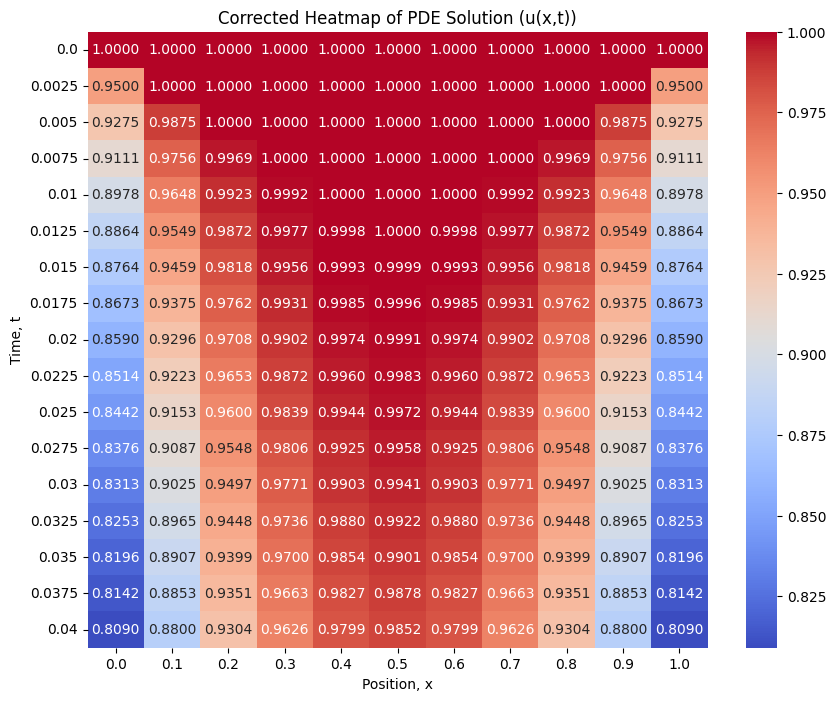

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
k = 0.0025  # time step
h = 0.1  # spatial step
t_final = 0.04
x_final = 1.0

# Number of steps
M = int(t_final / k) + 1  # Time steps
N = int(x_final / h) + 1  # Spatial steps

# Stability parameter
r = k / h**2

# Initialize solution matrix
u = np.ones((N, M))

for j in range(0, M - 1):
    for i in range(1, N - 1):
        u[i, j + 1] = u[i, j] + r * (u[i + 1, j] - 2*u[i, j] + u[i - 1, j])

    # Corrected boundary conditions
    #u[0, j + 1] = (u[1, j] - h*u[0, j])  # Left boundary
    u[0, j + 1] = 0.5 * (0.9 * u[0,j] + u[1,j])
    #u[-1, j + 1] = (u[-2, j] - h*u[-1, j]) # Right boundary
    #u[-1, j+1] = 0.25 * (u[-2,j] + 2 * u[-1,j] + u[0,j])
    u[-1, j + 1] = 0.5 * (0.9 * u[-1, j] + u[-2, j])



plt.figure(figsize=(10, 8))
sns.heatmap(u.T, cmap='coolwarm', annot=True, fmt=".4f",
            xticklabels=np.round(np.arange(0, x_final + h, h), 2),
            yticklabels=np.round(np.arange(0, t_final + k, k), 4))
plt.title('Corrected Heatmap of PDE Solution (u(x,t))')
plt.xlabel('Position, x')
plt.ylabel('Time, t')
plt.show()


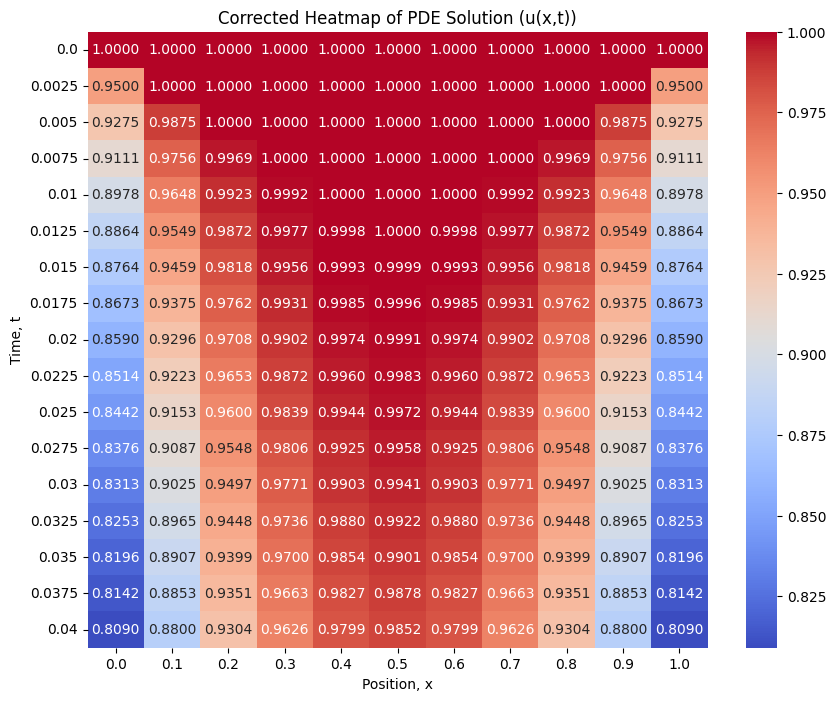

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
k = 0.0025  # time step
h = 0.1  # spatial step
t_final = 0.04
x_final = 1.0

# Number of steps
M = int(t_final / k) + 1  # Time steps
N = int(x_final / h) + 1  # Spatial steps

# Stability parameter
r = k / h**2

# Initialize solution matrix
u = np.ones((N, M))

for j in range(0, M - 1):
    for i in range(1, N - 1):
        u[i, j + 1] = u[i, j] + r * (u[i - 1, j] - 2*u[i, j] + u[i + 1, j])

    # Corrected boundary conditions

    u[0, j + 1] = 0.5 * (0.9 * u[0,j] + u[1,j])

    u[-1, j + 1] = 0.5 * (0.9 * u[-1, j] + u[-2, j])


plt.figure(figsize=(10, 8))
sns.heatmap(u.T, cmap='coolwarm', annot=True, fmt=".4f",
            xticklabels=np.round(np.arange(0, x_final + h, h), 2),
            yticklabels=np.round(np.arange(0, t_final + k, k), 4))
plt.title('Corrected Heatmap of PDE Solution (u(x,t))')
plt.xlabel('Position, x')
plt.ylabel('Time, t')
plt.show()


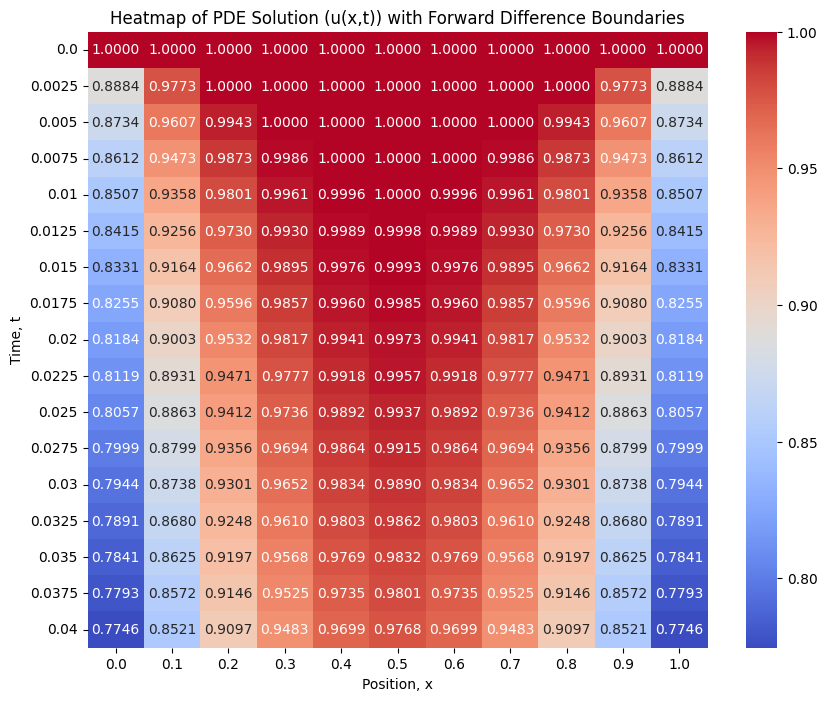

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
k = 0.0025  # time step
h = 0.1  # spatial step
t_final = 0.04
x_final = 1.0

# Number of steps
M = int(t_final / k) + 1  # Time steps
N = int(x_final / h) + 1  # Spatial steps

# Stability parameter
r = k / h**2

# Initialize solution matrix
u = np.ones((N, M))

for j in range(0, M - 1):
    for i in range(1, N - 1):
        u[i, j + 1] = u[i, j] + r * (u[i - 1, j] - 2*u[i, j] + u[i + 1, j])

    # Forward difference boundary conditions for the left boundary
    u[1, j + 1] = 8/11 * u[1, j] + 0.25 * u[2, j]
    u[0, j + 1] = 10/11 * u[1, j+1]

    # Symmetric forward difference boundary conditions for the right boundary
    u[-2, j + 1] = 8/11 * u[-2, j] + 0.25 * u[-3, j]  # Mirror the update of u[1, j + 1]
    u[-1, j + 1] = 10/11 * u[-2, j+1]  # Mirror the update of u[0, j + 1], using the newly updated value of its neighbor


plt.figure(figsize=(10, 8))
sns.heatmap(u.T, cmap='coolwarm', annot=True, fmt=".4f",
            xticklabels=np.round(np.arange(0, x_final + h, h), 2),
            yticklabels=np.round(np.arange(0, t_final + k, k), 4))
plt.title('Heatmap of PDE Solution (u(x,t)) with Forward Difference Boundaries')
plt.xlabel('Position, x')
plt.ylabel('Time, t')
plt.show()


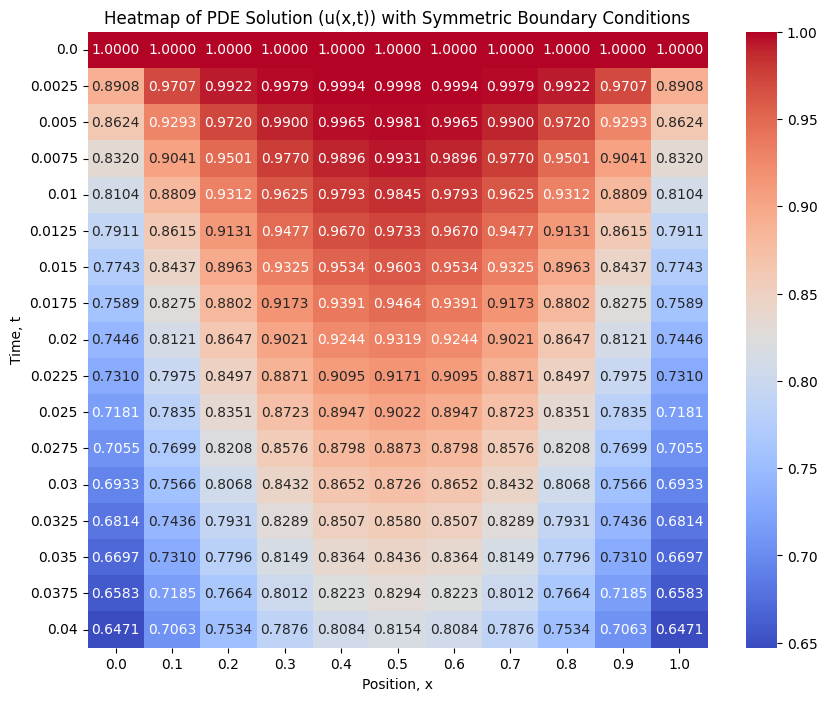

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
k = 0.0025  # time step
h = 0.1     # spatial step
t_final = 0.04
x_final = 1.0
r = k / h**2  # Stability parameter

# Number of steps
M = int(t_final / k) + 1  # Time steps
N = int(x_final / h) + 1  # Spatial steps

# Initialize solution matrix
u = np.ones((N, M))  # Initial condition

for j in range(M - 1):
    A = np.zeros((N, N))
    b = np.zeros(N)

    # Left boundary condition
    A[0, 0] = 2.1
    A[0, 1] = -1
    b[0] = -0.1 * u[0, j] + u[1, j]

    # Interior points setup
    for i in range(1, N - 1):
        A[i, i - 1] = -1
        A[i, i] = 4
        A[i, i + 1] = -1
        b[i] = u[i - 1, j] + u[i + 1, j]

    # Right boundary condition, enforcing symmetry with the left boundary
    A[-1, -2] = -1
    A[-1, -1] = 2.1
    b[-1] = 0.1 * u[-1, j] + u[-2, j]

    # Solve the system A * u[:, j + 1] = b
    u[:, j + 1] = np.linalg.solve(A, b)


    u[6, j + 1] = u[4, j + 1]
    u[7, j + 1] = u[3, j + 1]
    u[8, j + 1] = u[2, j + 1]
    u[9, j + 1] = u[1, j + 1]
    u[10, j + 1] = u[0, j + 1]

# Plotting with focus on the entire spatial domain but highlighting symmetry
plt.figure(figsize=(10, 8))
xtick_labels = np.round(np.arange(0, x_final + h, h), 2)
sns.heatmap(u.T, cmap='coolwarm', annot=True, fmt=".4f",
            xticklabels=xtick_labels,
            yticklabels=np.round(np.arange(0, t_final + k, k), 4))
plt.title('Heatmap of PDE Solution (u(x,t)) with Symmetric Boundary Conditions')
plt.xlabel('Position, x')
plt.ylabel('Time, t')
plt.show()



